In [1]:
# !pip3 install tabulate      # to produce latex table

In [2]:
# import functions
import os                                                                       # work with absolute directory path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import missingno as msno                                                        # visualize missing data
from statsmodels.stats.outliers_influence import variance_inflation_factor      # compute VIF

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.io as pio
from sklearn.impute import SimpleImputer
from tabulate import tabulate                                                   # latex table

# set display and graphics
pd.set_option('display.max_columns', None)  
sns.set(style = "whitegrid")                                                    # set the style for the plot
sns.set_context("paper")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"                                 # display output for all lines within a cell

# define working directory path
path_workdir = '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project'
path_fig = '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/Paper/figure'

In [3]:
# Load data file
dfa = pd.read_csv('/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/add1120_prep3.csv')
dfa = dfa.drop_duplicates(subset='mepsid')      # get unique cases
dfa = dfa.drop('mepsid', axis=1)                # drop case identifier

# Machine learning classification

ML Pre-process

In [4]:
# create dataframe
df_ml = dfa

# create all numeric data frame
object_columns = df_ml.select_dtypes(include=['object'])          # Select columns with the "object" data type
dummy_columns = pd.get_dummies(object_columns)                    # Get dummy variables for the selected columns 
df_ml = df_ml.drop(object_columns, axis=1)                        # Drop the object variables
df_mlnum = pd.concat([df_ml, dummy_columns], axis = 1)            # Concatenate the dummy columns with the original DataFrame
#   df_mlnum = df_mlnum.drop('hinotcov_No', axis=1)                   # Drop negation of target 
print(df_mlnum.dtypes)

age                                                float64
famsize                                            float64
ftotincmeps                                        float64
inctot                                             float64
ftotval                                            float64
                                                    ...   
povcat_High income (>=400% of poverty line)          uint8
povcat_Low income (125-199% of poverty line)         uint8
povcat_Middle income (200-399% of poverty line)      uint8
povcat_Near poor (100-124% of poverty line)          uint8
povcat_Negative or poor (<100% of poverty line)      uint8
Length: 87, dtype: object


ML setup

In [5]:
# Create numpy arrays for feature and target
X = df_mlnum.drop('hinotcov_Yes',axis=1).values               # feature
Y = df_mlnum['hinotcov_Yes'].values                           # target

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape
Y.shape

# Create test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 111)   
"""
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
"""
X_train.shape
Y_train.shape

(184573, 86)

(184573,)

"\n# Impute missing values with the mean\nimputer = SimpleImputer(strategy='mean')\nX_train = imputer.fit_transform(X_train)\nX_test = imputer.fit_transform(X_test)\n"

(147658, 86)

(147658,)

# Random forest ML classification

Plot a curve with training and test accuracy varying number of trees

RandomForestClassifier(n_estimators=5, random_state=0)

RandomForestClassifier(n_estimators=10, random_state=0)

RandomForestClassifier(n_estimators=15, random_state=0)

RandomForestClassifier(n_estimators=20, random_state=0)

RandomForestClassifier(n_estimators=25, random_state=0)

RandomForestClassifier(n_estimators=30, random_state=0)

RandomForestClassifier(n_estimators=35, random_state=0)

RandomForestClassifier(n_estimators=40, random_state=0)

RandomForestClassifier(n_estimators=45, random_state=0)

RandomForestClassifier(n_estimators=50, random_state=0)

Text(0.5, 0, 'Number of Trees')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Random Forest: Training and Test Accuracy vs Number of Trees')

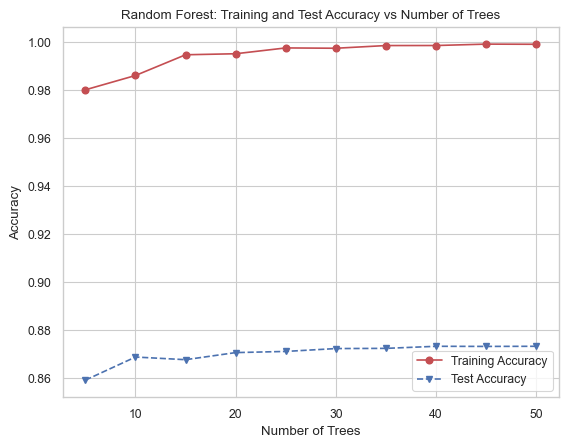

In [6]:
num_trees_list = list(range(5, 55, 5))                                       # Set the range of the number of trees

trainAcc = []                                                                # Empty list to store training accuracy
testAcc = []                                                                 # Empty list to store testing accuracy

for num_trees in num_trees_list:
    clf = RandomForestClassifier(n_estimators=num_trees, random_state=0)     # Create a Random Forest classifier
    clf.fit(X_train, Y_train)                                                # Fit the classifier to the training data
    Y_pred_train = clf.predict(X_train)                                      # Make predictions on the training set
    train_acc = accuracy_score(Y_train, Y_pred_train)                        # Calculate and store training accuracy
    trainAcc.append(train_acc)
    
    Y_pred_test = clf.predict(X_test)                                        # Make predictions on the test set
    
    test_acc = accuracy_score(Y_test, Y_pred_test)                           # Calculate and store test accuracy
    testAcc.append(test_acc)

plt.plot(num_trees_list, trainAcc, 'ro-', label='Training Accuracy')         # Plot
plt.plot(num_trees_list, testAcc, 'bv--', label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest: Training and Test Accuracy vs Number of Trees')
plt.savefig(os.path.join(path_fig, 'rf_accuracy_varytrees.png'))
plt.show()

Find the index of the maximum test accuracy (when the test accuracy graph starts to plateau)

In [7]:
best_num_trees_index = testAcc.index(max(testAcc))
best_num_trees = num_trees_list[best_num_trees_index]

print(f"Best Number of Trees: {best_num_trees}")

Best Number of Trees: 40


Run the classifier using training data set and evaluate with test data set with the best number of trees

In [8]:
best_clf = RandomForestClassifier(
    n_estimators = best_num_trees, random_state = 0)           # Create a Random Forest classifier with the best number of trees from Step a
best_clf.fit(X_train, Y_train)                                 # Train the classifier on the training dataset
Y_pred_train = best_clf.predict(X_train)                       # Make predictions on the training set
train_accuracy = accuracy_score(Y_train, Y_pred_train)         # Evaluate training accuracy
print("Training Accuracy:", train_accuracy)
Y_pred_test = best_clf.predict(X_test)                         # Make predictions on the test set
test_accuracy = accuracy_score(Y_test, Y_pred_test)            # Evaluate test accuracy
print("Test Accuracy:", test_accuracy)

table_data = [['Metric', 'Value'],                             # Create a table in LaTeX format
              ['Training Accuracy', train_accuracy],
              ['Test Accuracy', test_accuracy]]
table_latex = tabulate(table_data, tablefmt="latex_raw")
file_path = os.path.join(path_fig, 'rf_table_accuracy.tex')    # Specify the file path using os.path.join
with open(file_path, 'w') as file:
    file.write(table_latex)                                    # Save the LaTeX table to the specified file path
print(f"Table saved to '{file_path}'")

RandomForestClassifier(n_estimators=40, random_state=0)

Training Accuracy: 0.998496525755462
Test Accuracy: 0.8732493566300962


176

Table saved to '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/Paper/figure/rf_table_accuracy.tex'


Cross-table (confusion matrix) with true and predicted labels from test data

<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix (Training Set)')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix (Test Set)')

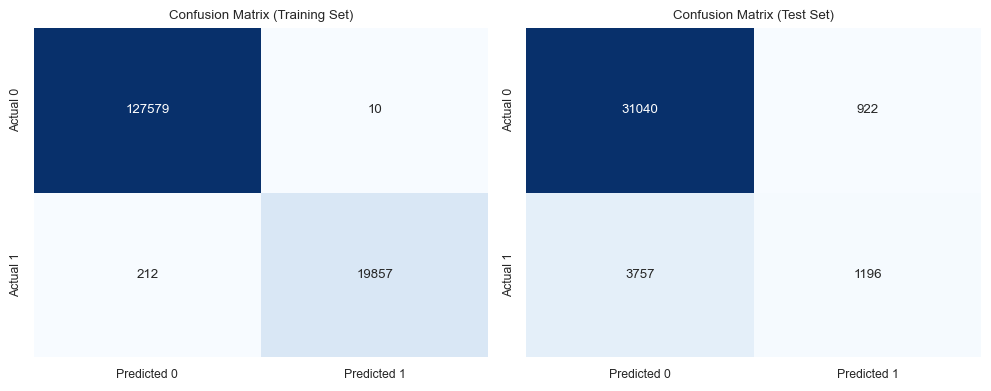

In [9]:
conf_matrix_train = confusion_matrix(Y_train, Y_pred_train)              # Confusion Matrix for training data
class_report_train = classification_report(Y_train, Y_pred_train)        # Classification Report for training data
conf_matrix_test = confusion_matrix(Y_test, Y_pred_test)                 # Confusion Matrix for test data
class_report_test = classification_report(Y_test, Y_pred_test)           # Classification Report for test data

plt.figure(figsize=(10, 4))                                              # Visualize Confusion Matrix

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Training Set)')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Test Set)')

plt.tight_layout()
plt.savefig(os.path.join(path_fig, 'rf_confmat.png'))
plt.show()

Accuracy, sensitivity and specificity

In [10]:

def calculate_metrics(conf_matrix):                                         # Define a function to calculate sensitivity and specificity
    true_positives = conf_matrix[1, 1]
    false_positives = conf_matrix[0, 1]
    true_negatives = conf_matrix[0, 0]
    false_negatives = conf_matrix[1, 0]

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    return accuracy, sensitivity, specificity


accuracy_train, sensitivity_train, specificity_train = calculate_metrics(conf_matrix_train)     # Calculate metrics for training set


accuracy_test, sensitivity_test, specificity_test = calculate_metrics(conf_matrix_test)         # Calculate metrics for test set


print("Training Set Metrics:")                                                                  # Print the results
print("Accuracy:", accuracy_train)
print("Sensitivity:", sensitivity_train)
print("Specificity:", specificity_train)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Sensitivity:", sensitivity_test)
print("Specificity:", specificity_test)

accuracy_train, sensitivity_train, specificity_train = calculate_metrics(conf_matrix_train)
accuracy_test, sensitivity_test, specificity_test = calculate_metrics(conf_matrix_test)

# Create a table in LaTeX format
table_data = [['Metric', 'Training Set', 'Test Set'],
              ['Accuracy', accuracy_train, accuracy_test],
              ['Sensitivity', sensitivity_train, sensitivity_test],
              ['Specificity', specificity_train, specificity_test]]

table_latex = tabulate(table_data, tablefmt="latex_raw")

file_path = os.path.join(path_fig, 'rf_table_acc_sens_spec.tex')     # Specify the file path using os.path.join
with open(file_path, 'w') as file:
    file.write(table_latex)                                          # Save the LaTeX table to the specified file path
print(f"Table saved to '{file_path}'")

Training Set Metrics:
Accuracy: 0.998496525755462
Sensitivity: 0.9894364442672778
Specificity: 0.9999216233374351

Test Set Metrics:
Accuracy: 0.8732493566300962
Sensitivity: 0.24146981627296588
Specificity: 0.9711532444778174


284

Table saved to '/Users/azfar/Documents/Python/Health Data Analytics Using Python/Project/Paper/figure/rf_table_acc_sens_spec.tex'


Find the important features and plot the features with important score

Feature importances:
[1.25404933e-01 5.17567276e-02 1.09774533e-01 8.18052834e-02
 1.05197146e-01 7.50911914e-02 1.19663802e-01 9.74277182e-03
 9.86891819e-03 5.80784600e-03 8.68474174e-03 6.89862160e-03
 1.25320329e-02 3.75789390e-03 8.41766750e-04 3.27899938e-03
 2.55648428e-03 6.93594579e-03 8.93401732e-03 4.97685115e-05
 1.52189360e-04 8.63707048e-04 1.86813609e-04 1.08884410e-04
 1.48628825e-03 6.05879061e-04 1.45671669e-03 1.01280962e-03
 1.54969033e-02 2.74912446e-03 2.39794471e-02 1.35030477e-04
 9.08472743e-04 7.47308510e-04 2.97268764e-02 4.40339917e-03
 2.15565760e-03 3.35112207e-03 7.30221024e-03 7.73401146e-04
 5.84995636e-03 1.05981134e-03 4.73477634e-03 5.37729367e-03
 2.93591939e-03 1.33876823e-03 2.00059945e-03 1.66186506e-03
 1.86845221e-03 3.76971044e-03 2.26223825e-03 4.17285880e-03
 2.55524823e-03 4.97082173e-03 5.86753657e-03 7.60726941e-04
 1.20146084e-02 2.60143733e-03 9.89258904e-04 2.24620425e-03
 1.65180449e-03 8.93002777e-04 4.73013945e-03 1.88198323e-04
 9.

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 65 artists>

([<matplotlib.axis.YTick at 0x15b5f0040>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'povlev'),
  Text(0, 2, 'ftotincmeps'),
  Text(0, 3, 'ftotval'),
  Text(0, 4, 'inctot'),
  Text(0, 5, 'incwage'),
  Text(0, 6, 'famsize'),
  Text(0, 7, 'usborn_Unknown-refused'),
  Text(0, 8, 'usborn_NIU'),
  Text(0, 9, 'racea_Pacific Islander'),
  Text(0, 10, 'marstat_NIU'),
  Text(0, 11, 'educ_High school diploma or GED'),
  Text(0, 12, 'sex_Female'),
  Text(0, 13, 'educ_Professional (MD,DDS,DVM,JD)'),
  Text(0, 14, 'hinotcov_Yes'),
  Text(0, 15, 'racea_Asian'),
  Text(0, 16, 'marstat_Divorced'),
  Text(0, 17, 'foodstyn_NIU'),
  Text(0, 18, "foodstyn_Unknown -Don't know"),
  Text(0, 19, 'educ_AA degree: technical/vocational/occupational'),
  Text(0, 20, 'racea_Alaskan Native or American Indian'),
  Text(0, 21, 'marstat_Married'),
  Text(0, 22, 'foodstyn_Yes'),
  Text(0, 23, 'educ_Grade 9'),
  Text(0, 24, 'educ_Doctoral degree (PhD, EdD)'),
  Text(0, 25, 'sex_Male'),
  Text(0, 26, 'student_NIU'),
  Text(0, 27,

Text(0.5, 0, 'Feature importance')

Text(0, 0.5, 'Feature')

(-1.0, 65.0)

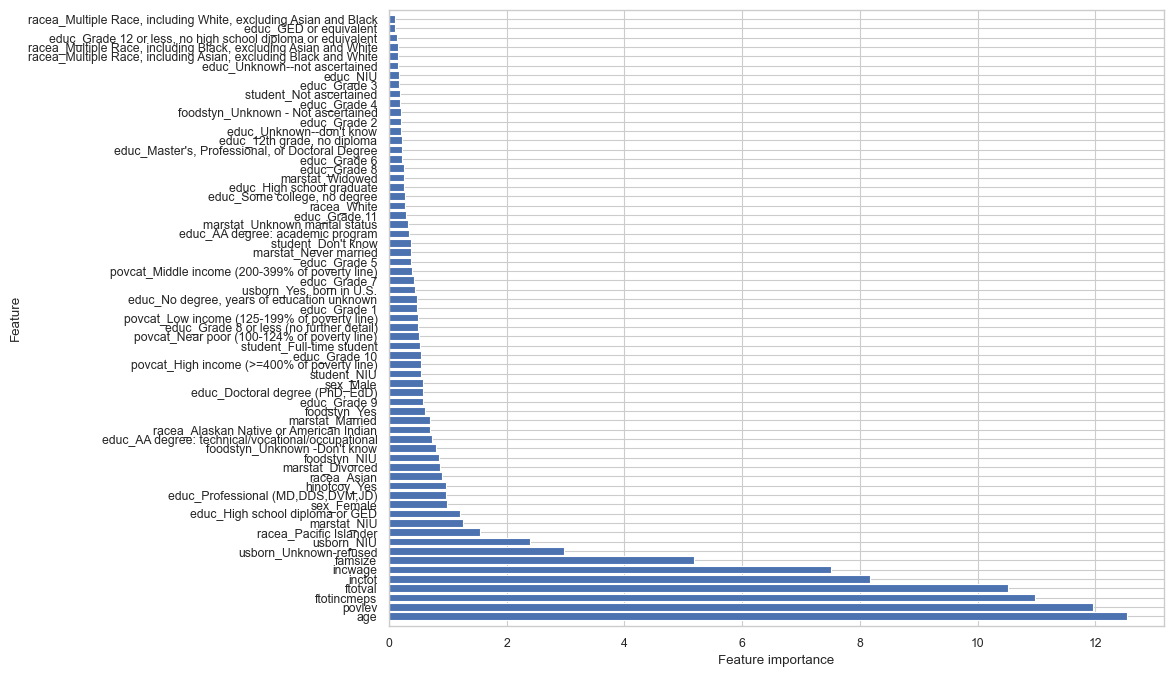

In [14]:
print("Feature importances:\n{}".format(best_clf.feature_importances_))

important_features_dict = {}
for x,i in enumerate(best_clf.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

# get the sorted feature list based on importance scores
# create an empty dictionary of features and importance scores
featureImpList= []
feature_names=list(df_mlnum.columns[0:109])

for feat, importance in zip(feature_names, best_clf.feature_importances_):  
        if importance > 0.001:
            temp = [feat, importance*100]
            featureImpList.append(temp)

# create a dataframe
fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
# sort the values
fT_df_sorted = fT_df.sort_values('Importance', ascending = False)
print (fT_df_sorted)

# plot the sorted importances 
plt.figure(figsize=(10,8))
n_features = len(fT_df_sorted)
plt.barh(range(n_features), fT_df_sorted['Importance'], align='center')
plt.yticks(np.arange(n_features), fT_df_sorted['Feature'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.savefig(os.path.join(path_fig, 'rf_important_elements.png'))